# Decay length and Branching Ratios

## Leptophilic universal couplings

In [3]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    #"font.family": "Helvetica"
})
import pandas as pd
from scipy.integrate import quad

In [4]:
GF = 1.1663788e-5 #GeV-2
mZ = 91.1876 #GeV
mW = 80.377
mtau = 1.77686 #GeV
mmu = 105.6583755e-3 #GeV
me = 0.51099895e-3 #GeV
mhiggs = 125.25 #GeV
vev = 246 #GeV
t = mtau**2/mZ**2
prefactor = 2**0.5/4*mZ**2*GF #(g/4cW)^2
hbarc = 1.973269804e-10 # GeV μm
s2W = 0.22339 #\sin^2\theta_W at tree level (=1-mW^2/mZ^2)
c2W = 1-s2W
s2Weff = 0.23122 #\sin^2\theta_W with 1-loop corrections
c2Weff = 1-s2Weff
c = 1-4*s2W
a_em = 1/137
Lambda = 1000

In [5]:
def integrand_FHiggs(x, z, ma, ml):
    y = 1-x-z
    return (2*ml**2-x*mhiggs**2-z*mZ**2)/(ml**2-x*y*mhiggs**2-y*z*mZ**2-x*z*ma**2)

def int1_FHiggs(z, ma, ml):
    return quad(integrand_FHiggs, 0, 1, (z, ma, ml))[0]

def FHiggs(ma, ml):
    return quad(int1_FHiggs, 0, 1, (ma, ml))[0]

In [6]:
def Gamma_phi(mphi: float) -> list[float]:
    chiV = 0
    chiA = 1
    def f(x):
        if x >= 1:
            return np.arcsin(x**-0.5)
        else:
            return np.pi/2+0.5j*np.log((1+(1-x)**0.5)/(1-(1-x)**0.5))
    B1 = lambda x: 1-x*f(x)**2
    B3 = lambda x, y: 1- x*y/(y-x)*(f(x)**2-f(y)**2)
    kallen = lambda x, y, z: x**2+y**2+z**2-2*x*y-2*x*z-2*y*z
    res = [chiA**2*a_em**2*mphi**3/(Lambda**2*(4*np.pi)**3)*abs(B1(4*mtau**2/mphi**2)+B1(4*me**2/mphi**2)+B1(4*mmu**2/mphi**2))**2, 0, 0, 0, 0, 0, 0]
    #res = [4*np.pi*a_em**2/Lambda**2*mphi**3*abs(B1(4*mtau**2/mphi**2)+0*B1(4*mmu**2/mphi**2)+0*B1(4*me**2/mphi**2))**2/(16*np.pi)**2, 0, 0, 0]
    if mphi > 2*me:
        res[1] = chiA**2*mphi * me**2/(8*np.pi*Lambda**2)*np.sqrt(1-4*me**2/mphi**2)
    if mphi > 2*mmu:
        res[2] = chiA**2*mphi * mmu**2/(8*np.pi*Lambda**2)*np.sqrt(1-4*mmu**2/mphi**2)
    if mphi > 2*mtau:
        res[3] = chiA**2*mphi * mtau**2/(8*np.pi*Lambda**2)*np.sqrt(1-4*mtau**2/mphi**2)
    if mphi > mZ:
        cgammaZ = chiA*(1-4*s2W)/(2*s2W**0.5*c2W**0.5)*abs(B3(4*mtau**2/mphi**2, 4*mtau**2/mZ**2)+B3(4*me**2/mphi**2, 4*me**2/mZ**2)+B3(4*mmu**2/mphi**2, 4*mmu**2/mZ**2))**2-3*chiV/(2*s2W**0.5*c2W**0.5)
        res[4] = a_em**2*mphi**3/(2*Lambda**2*(4*np.pi)**3)*(1-mZ**2/mphi**2)**3*abs(cgammaZ)**2
    if mphi > 2*mW:
        cWW = 3/(2*s2W)*(chiA-chiV)
        res[5] = a_em**2*mphi**3/(2*Lambda**2*(4*np.pi)**3)*(1-4*mW**2/mphi**2)**1.5*abs(cWW)**2
    if mphi > 2*mZ:
        cZZ = 3*(chiA*(1-2*s2W+4*s2W**2)-chiV*(1-2*s2W))/(4*s2W*c2W)
        res[6] = a_em**2*mphi**3/(Lambda**2*(4*np.pi)**3)*(1-4*mZ**2/mphi**2)**1.5*abs(cZZ)**2
    #if mphi > mZ+mhiggs:
    #    res[7] = 1/(2*(8*np.pi)**3*Lambda**2*vev**2)*kallen(mphi**2, mhiggs**2, mZ**2)**1.5/(mphi**3*mZ**2)*(me**2*FHiggs(mphi, me)+mmu**2*FHiggs(mphi, mmu)+mtau**2*FHiggs(mphi, mtau))**2
    return res

In [7]:
list_mphi = [10**x for x in np.linspace(-4, 3.5, 300)]
listGamma = [Gamma_phi(m) for m in list_mphi]

/tmp/ipykernel_21501/2742625129.py:10: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 2e-6)


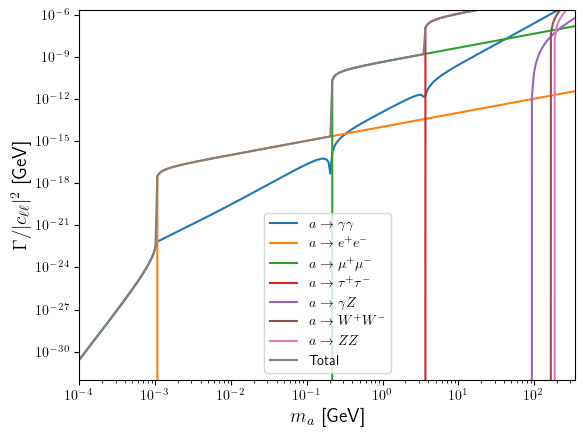

In [8]:
plt.loglog(list_mphi, [l[0] for l in listGamma], label= r"$a\to\gamma\gamma$")
plt.loglog(list_mphi, [l[1] for l in listGamma], label= r"$a\to e^+ e^-$")
plt.loglog(list_mphi, [l[2] for l in listGamma], label= r"$a\to \mu^+ \mu^-$")
plt.loglog(list_mphi, [l[3] for l in listGamma], label=r"$a\to \tau^+ \tau^-$")
plt.loglog(list_mphi, [l[4] for l in listGamma], label=r"$a\to \gamma Z$")
plt.loglog(list_mphi, [l[5] for l in listGamma], label=r"$a\to W^+ W^-$")
plt.loglog(list_mphi, [l[6] for l in listGamma], label=r"$a\to ZZ$")
#plt.loglog(list_mphi, [l[7] for l in listGamma], label=r"$a\to Zh$")
plt.loglog(list_mphi, [sum(l) for l in listGamma], label='Total')
plt.ylim(0, 2e-6)
plt.xlim(1e-4, 350)
plt.xlabel(r'$m_a$ [GeV]', fontsize=14)
plt.ylabel(r"$\Gamma/|c_{\ell\ell}|^2$ [GeV]", fontsize=14)
plt.legend()

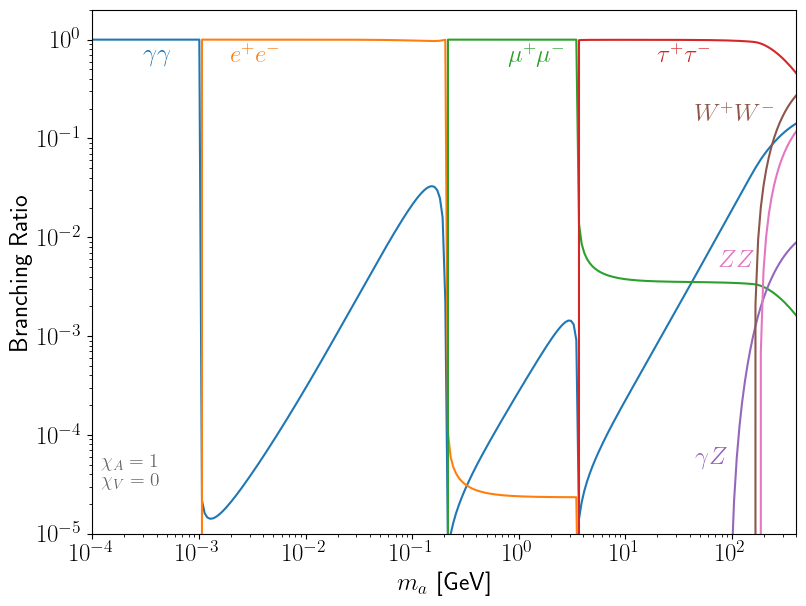

In [34]:
fig = plt.figure(figsize=(8,6))
plt.loglog(list_mphi, [l[0]/sum(l) for l in listGamma], label=r'$\gamma\gamma$', lw=1.5)
plt.annotate(r"$\gamma\gamma$", (3e-4, 0.6), color='tab:blue', fontsize=18)
plt.loglog(list_mphi, [l[1]/sum(l) for l in listGamma], label=r'$e^+e^-$', lw=1.5)
plt.annotate(r"$e^+e^-$", (2e-3, 0.6), color='tab:orange', fontsize=18)
plt.loglog(list_mphi, [l[2]/sum(l) for l in listGamma], label=r'$\mu^+\mu^-$', lw=1.5)
plt.annotate(r"$\mu^+\mu^-$", (0.8, 0.6), color='tab:green', fontsize=18)
plt.loglog(list_mphi, [l[3]/sum(l) for l in listGamma], label=r'$\tau^+\tau^-$', lw=1.5)
plt.annotate(r"$\tau^+\tau^-$", (20, 0.6), color='tab:red', fontsize=18)
plt.loglog(list_mphi, [l[4]/sum(l) for l in listGamma], label=r'$\gamma Z$', lw=1.5)
plt.annotate(r"$\gamma Z$", (45, 5e-5), color='tab:purple', fontsize=18)
plt.loglog(list_mphi, [l[5]/sum(l) for l in listGamma], label=r'$W^+ W^-$', lw=1.5)
plt.annotate(r"$W^+W^-$", (45, 0.15), color='tab:brown', fontsize=18)
plt.loglog(list_mphi, [l[6]/sum(l) for l in listGamma], label=r'$Z Z$', lw=1.5)
plt.annotate(r"$ZZ$", (75, 5e-3), color='tab:pink', fontsize=18)
plt.ylim([1e-5, 2])
plt.xlim(1e-4, 400)
plt.xlabel(r'$m_a$ [GeV]', fontsize=18)
plt.ylabel(r"Branching Ratio", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.annotate(r"$\chi_A = 1$" + '\n' + r"$\chi_V=0$", (1.2e-4, 3e-5), fontsize=14, color=(0.4, 0.4, 0.4))
#plt.yticks([1e-10,1e-8,1e-6,1e-4,1e-2,1])
#plt.legend(fontsize=16)
plt.tight_layout(pad=0.5)
#fig.patch.set_alpha(0)
plt.savefig('BR.pdf')

In [10]:
max(l[6]/sum(l) for l in listGamma)

0.24438986120031364

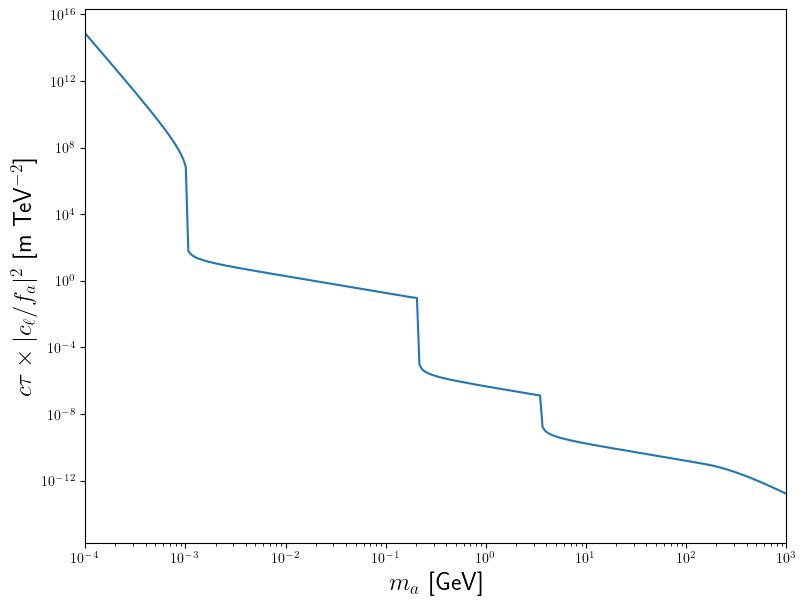

In [11]:
fig = plt.figure(figsize=(8,6))
plt.loglog(list_mphi, [hbarc/sum(l)*1e-6 for l in listGamma])
plt.xlabel(r'$m_a$ [GeV]', fontsize=18)
plt.ylabel(r"$c\tau\times|c_\ell/f_a|^2$ [m TeV${}^{-2}$]", fontsize=18)
plt.xlim(1e-4, 1000)
plt.tight_layout(pad=0.5)
#fig.patch.set_alpha(0)
plt.savefig('decaylength.png')

### $\chi_V$

In [12]:
def Gamma_phi_V(mphi: float) -> list[float]:
    chiV = 1
    chiA = 0
    def f(x):
        if x >= 1:
            return np.arcsin(x**-0.5)
        else:
            return np.pi/2+0.5j*np.log((1+(1-x)**0.5)/(1-(1-x)**0.5))
    B1 = lambda x: 1-x*f(x)**2
    B3 = lambda x, y: 1- x*y/(y-x)*(f(x)**2-f(y)**2)
    kallen = lambda x, y, z: x**2+y**2+z**2-2*x*y-2*x*z-2*y*z
    res = [chiA**2*a_em**2*mphi**3/(Lambda**2*(4*np.pi)**3)*abs(B1(4*mtau**2/mphi**2)+B1(4*me**2/mphi**2)+B1(4*mmu**2/mphi**2))**2, 0, 0, 0, 0, 0, 0]
    #res = [4*np.pi*a_em**2/Lambda**2*mphi**3*abs(B1(4*mtau**2/mphi**2)+0*B1(4*mmu**2/mphi**2)+0*B1(4*me**2/mphi**2))**2/(16*np.pi)**2, 0, 0, 0]
    if mphi > 2*me:
        res[1] = chiA**2*mphi * me**2/(8*np.pi*Lambda**2)*np.sqrt(1-4*me**2/mphi**2)
    if mphi > 2*mmu:
        res[2] = chiA**2*mphi * mmu**2/(8*np.pi*Lambda**2)*np.sqrt(1-4*mmu**2/mphi**2)
    if mphi > 2*mtau:
        res[3] = chiA**2*mphi * mtau**2/(8*np.pi*Lambda**2)*np.sqrt(1-4*mtau**2/mphi**2)
    if mphi > mZ:
        cgammaZ = chiA*(1-4*s2W)/(2*s2W**0.5*c2W**0.5)*abs(B3(4*mtau**2/mphi**2, 4*mtau**2/mZ**2)+B3(4*me**2/mphi**2, 4*me**2/mZ**2)+B3(4*mmu**2/mphi**2, 4*mmu**2/mZ**2))**2-3*chiV/(2*s2W**0.5*c2W**0.5)
        res[4] = a_em**2*mphi**3/(2*Lambda**2*(4*np.pi)**3)*(1-mZ**2/mphi**2)**3*abs(cgammaZ)**2
    if mphi > 2*mW:
        cWW = 3/(2*s2W)*(chiA-chiV)
        res[5] = a_em**2*mphi**3/(2*Lambda**2*(4*np.pi)**3)*(1-4*mW**2/mphi**2)**1.5*abs(cWW)**2
    if mphi > 2*mZ:
        cZZ = 3*(chiA*(1-2*s2W+4*s2W**2)-chiV*(1-2*s2W))/(4*s2W*c2W)
        res[6] = a_em**2*mphi**3/(Lambda**2*(4*np.pi)**3)*(1-4*mZ**2/mphi**2)**1.5*abs(cZZ)**2
    #if mphi > mZ+mhiggs:
    #    res[7] = 1/(2*(8*np.pi)**3*Lambda**2*vev**2)*kallen(mphi**2, mhiggs**2, mZ**2)**1.5/(mphi**3*mZ**2)*(me**2*FHiggs(mphi, me)+mmu**2*FHiggs(mphi, mmu)+mtau**2*FHiggs(mphi, mtau))**2
    return res

In [13]:
listGamma_V = [Gamma_phi_V(m) for m in [10**x for x in np.linspace(1.9, 3.5, 300)]]

/tmp/ipykernel_21501/3352949933.py:10: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 2e-6)


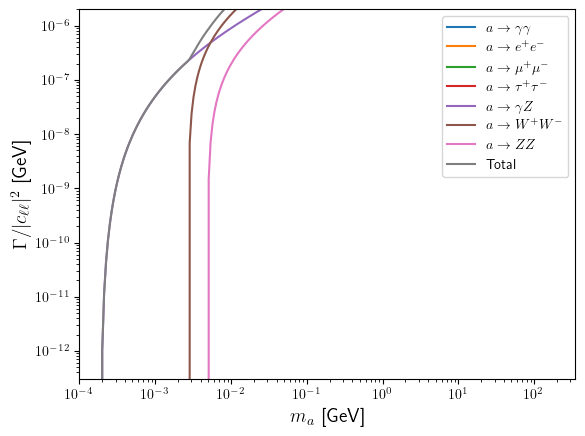

In [14]:
plt.loglog(list_mphi, [l[0] for l in listGamma_V], label= r"$a\to\gamma\gamma$")
plt.loglog(list_mphi, [l[1] for l in listGamma_V], label= r"$a\to e^+ e^-$")
plt.loglog(list_mphi, [l[2] for l in listGamma_V], label= r"$a\to \mu^+ \mu^-$")
plt.loglog(list_mphi, [l[3] for l in listGamma_V], label=r"$a\to \tau^+ \tau^-$")
plt.loglog(list_mphi, [l[4] for l in listGamma_V], label=r"$a\to \gamma Z$")
plt.loglog(list_mphi, [l[5] for l in listGamma_V], label=r"$a\to W^+ W^-$")
plt.loglog(list_mphi, [l[6] for l in listGamma_V], label=r"$a\to ZZ$")
#plt.loglog(list_mphi, [l[7] for l in listGamma], label=r"$a\to Zh$")
plt.loglog(list_mphi, [sum(l) for l in listGamma_V], label='Total')
plt.ylim(0, 2e-6)
plt.xlim(1e-4, 350)
plt.xlabel(r'$m_a$ [GeV]', fontsize=14)
plt.ylabel(r"$\Gamma/|c_{\ell\ell}|^2$ [GeV]", fontsize=14)
plt.legend()

/tmp/ipykernel_21501/4037428892.py:10: RuntimeWarning: invalid value encountered in scalar divide
  plt.loglog([10**x for x in np.linspace(1.9, 3.5, 300)], [l[4]/sum(l) for l in listGamma_V], label=r'$\gamma Z$', lw=1.5, c='tab:purple')
/tmp/ipykernel_21501/4037428892.py:12: RuntimeWarning: invalid value encountered in scalar divide
  plt.loglog([10**x for x in np.linspace(1.9, 3.5, 300)], [l[5]/sum(l) for l in listGamma_V], label=r'$W^+ W^-$', lw=1.5, c='tab:brown')
/tmp/ipykernel_21501/4037428892.py:14: RuntimeWarning: invalid value encountered in scalar divide
  plt.loglog([10**x for x in np.linspace(1.9, 3.5, 300)], [l[6]/sum(l) for l in listGamma_V], label=r'$Z Z$', lw=1.5, c='tab:pink')


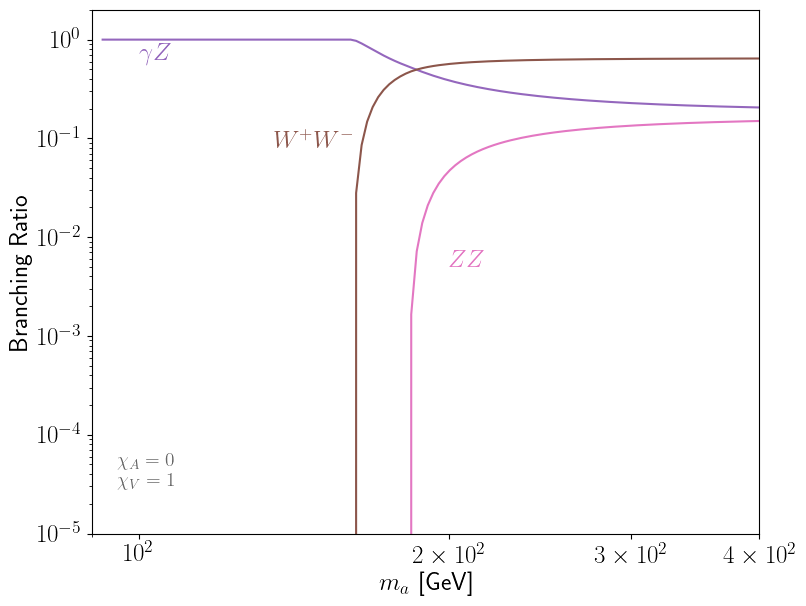

In [15]:
fig = plt.figure(figsize=(8,6))
#plt.loglog(list_mphi, [l[0]/sum(l) for l in listGamma_V], label=r'$\gamma\gamma$', lw=1.5)
#plt.annotate(r"$\gamma\gamma$", (3e-4, 0.6), color='tab:blue', fontsize=18)
#plt.loglog(list_mphi, [l[1]/sum(l) for l in listGamma_V], label=r'$e^+e^-$', lw=1.5)
#plt.annotate(r"$e^+e^-$", (2e-3, 0.6), color='tab:orange', fontsize=18)
#plt.loglog(list_mphi, [l[2]/sum(l) for l in listGamma_V], label=r'$\mu^+\mu^-$', lw=1.5)
#plt.annotate(r"$\mu^+\mu^-$", (0.8, 0.6), color='tab:green', fontsize=18)
#plt.loglog(list_mphi, [l[3]/sum(l) for l in listGamma_V], label=r'$\tau^+\tau^-$', lw=1.5)
#plt.annotate(r"$\tau^+\tau^-$", (20, 0.6), color='tab:red', fontsize=18)
plt.loglog([10**x for x in np.linspace(1.9, 3.5, 300)], [l[4]/sum(l) for l in listGamma_V], label=r'$\gamma Z$', lw=1.5, c='tab:purple')
plt.annotate(r"$\gamma Z$", (100, 0.6), color='tab:purple', fontsize=18)
plt.loglog([10**x for x in np.linspace(1.9, 3.5, 300)], [l[5]/sum(l) for l in listGamma_V], label=r'$W^+ W^-$', lw=1.5, c='tab:brown')
plt.annotate(r"$W^+W^-$", (135, 0.08), color='tab:brown', fontsize=18)
plt.loglog([10**x for x in np.linspace(1.9, 3.5, 300)], [l[6]/sum(l) for l in listGamma_V], label=r'$Z Z$', lw=1.5, c='tab:pink')
plt.annotate(r"$ZZ$", (200, 5e-3), color='tab:pink', fontsize=18)
plt.ylim([1e-5, 2])
plt.xlim(90, 400)
plt.xlabel(r'$m_a$ [GeV]', fontsize=18)
plt.ylabel(r"Branching Ratio", fontsize=18)
plt.xticks([100, 200, 300, 400], fontsize=18)
plt.yticks(fontsize=18)
plt.annotate(r"$\chi_A = 0$" + '\n' + r"$\chi_V=1$", (95, 3e-5), fontsize=14, color=(0.4, 0.4, 0.4))
#plt.yticks([1e-10,1e-8,1e-6,1e-4,1e-2,1])
#plt.legend(fontsize=16)
plt.tight_layout(pad=0.5)
#fig.patch.set_alpha(0)

### $\chi_L$

In [16]:
def Gamma_phi_L(mphi: float) -> list[float]:
    chiV = 0.5
    chiA = -0.5
    def f(x):
        if x >= 1:
            return np.arcsin(x**-0.5)
        else:
            return np.pi/2+0.5j*np.log((1+(1-x)**0.5)/(1-(1-x)**0.5))
    B1 = lambda x: 1-x*f(x)**2
    B3 = lambda x, y: 1- x*y/(y-x)*(f(x)**2-f(y)**2)
    kallen = lambda x, y, z: x**2+y**2+z**2-2*x*y-2*x*z-2*y*z
    res = [chiA**2*a_em**2*mphi**3/(Lambda**2*(4*np.pi)**3)*abs(B1(4*mtau**2/mphi**2)+B1(4*me**2/mphi**2)+B1(4*mmu**2/mphi**2))**2, 0, 0, 0, 0, 0, 0]
    #res = [4*np.pi*a_em**2/Lambda**2*mphi**3*abs(B1(4*mtau**2/mphi**2)+0*B1(4*mmu**2/mphi**2)+0*B1(4*me**2/mphi**2))**2/(16*np.pi)**2, 0, 0, 0]
    if mphi > 2*me:
        res[1] = chiA**2*mphi * me**2/(8*np.pi*Lambda**2)*np.sqrt(1-4*me**2/mphi**2)
    if mphi > 2*mmu:
        res[2] = chiA**2*mphi * mmu**2/(8*np.pi*Lambda**2)*np.sqrt(1-4*mmu**2/mphi**2)
    if mphi > 2*mtau:
        res[3] = chiA**2*mphi * mtau**2/(8*np.pi*Lambda**2)*np.sqrt(1-4*mtau**2/mphi**2)
    if mphi > mZ:
        cgammaZ = chiA*(1-4*s2W)/(2*s2W**0.5*c2W**0.5)*abs(B3(4*mtau**2/mphi**2, 4*mtau**2/mZ**2)+B3(4*me**2/mphi**2, 4*me**2/mZ**2)+B3(4*mmu**2/mphi**2, 4*mmu**2/mZ**2))**2-3*chiV/(2*s2W**0.5*c2W**0.5)
        res[4] = a_em**2*mphi**3/(2*Lambda**2*(4*np.pi)**3)*(1-mZ**2/mphi**2)**3*abs(cgammaZ)**2
    if mphi > 2*mW:
        cWW = 3/(2*s2W)*(chiA-chiV)
        res[5] = a_em**2*mphi**3/(2*Lambda**2*(4*np.pi)**3)*(1-4*mW**2/mphi**2)**1.5*abs(cWW)**2
    if mphi > 2*mZ:
        cZZ = 3*(chiA*(1-2*s2W+4*s2W**2)-chiV*(1-2*s2W))/(4*s2W*c2W)
        res[6] = a_em**2*mphi**3/(Lambda**2*(4*np.pi)**3)*(1-4*mZ**2/mphi**2)**1.5*abs(cZZ)**2
    #if mphi > mZ+mhiggs:
    #    res[7] = 1/(2*(8*np.pi)**3*Lambda**2*vev**2)*kallen(mphi**2, mhiggs**2, mZ**2)**1.5/(mphi**3*mZ**2)*(me**2*FHiggs(mphi, me)+mmu**2*FHiggs(mphi, mmu)+mtau**2*FHiggs(mphi, mtau))**2
    return res

In [17]:
listGamma_L = [Gamma_phi_L(m) for m in list_mphi]

/tmp/ipykernel_21501/671387001.py:10: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 2e-6)


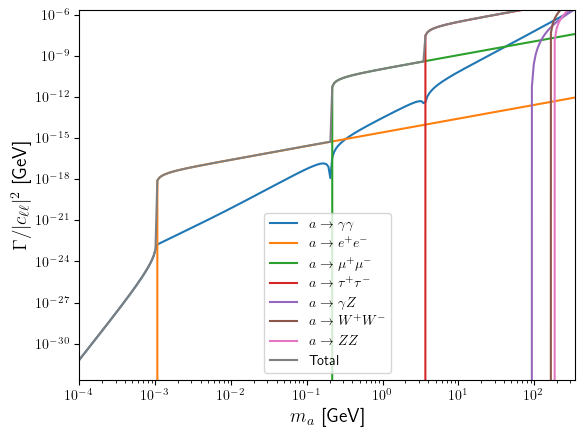

In [18]:
plt.loglog(list_mphi, [l[0] for l in listGamma_L], label= r"$a\to\gamma\gamma$")
plt.loglog(list_mphi, [l[1] for l in listGamma_L], label= r"$a\to e^+ e^-$")
plt.loglog(list_mphi, [l[2] for l in listGamma_L], label= r"$a\to \mu^+ \mu^-$")
plt.loglog(list_mphi, [l[3] for l in listGamma_L], label=r"$a\to \tau^+ \tau^-$")
plt.loglog(list_mphi, [l[4] for l in listGamma_L], label=r"$a\to \gamma Z$")
plt.loglog(list_mphi, [l[5] for l in listGamma_L], label=r"$a\to W^+ W^-$")
plt.loglog(list_mphi, [l[6] for l in listGamma_L], label=r"$a\to ZZ$")
#plt.loglog(list_mphi, [l[7] for l in listGamma], label=r"$a\to Zh$")
plt.loglog(list_mphi, [sum(l) for l in listGamma_L], label='Total')
plt.ylim(0, 2e-6)
plt.xlim(1e-4, 350)
plt.xlabel(r'$m_a$ [GeV]', fontsize=14)
plt.ylabel(r"$\Gamma/|c_{\ell\ell}|^2$ [GeV]", fontsize=14)
plt.legend()

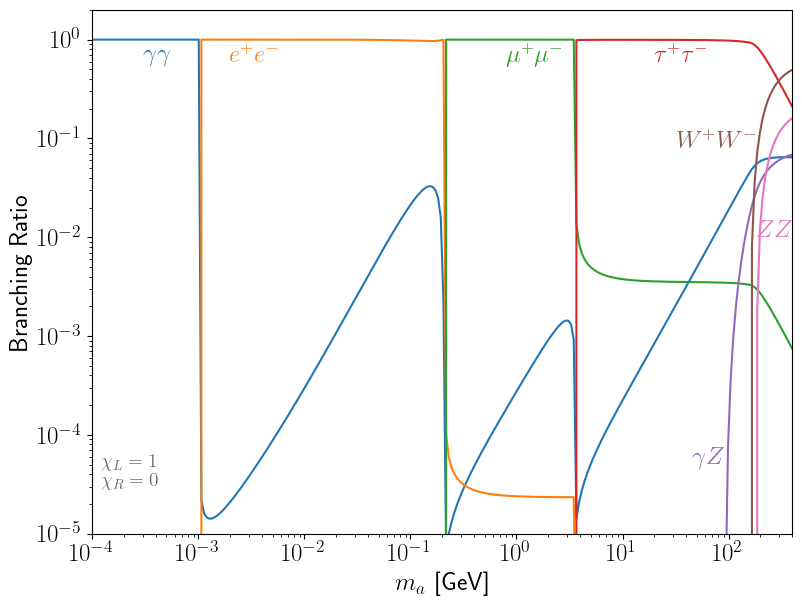

In [19]:
fig = plt.figure(figsize=(8,6))
plt.loglog(list_mphi, [l[0]/sum(l) for l in listGamma_L], label=r'$\gamma\gamma$', lw=1.5)
plt.annotate(r"$\gamma\gamma$", (3e-4, 0.6), color='tab:blue', fontsize=18)
plt.loglog(list_mphi, [l[1]/sum(l) for l in listGamma_L], label=r'$e^+e^-$', lw=1.5)
plt.annotate(r"$e^+e^-$", (2e-3, 0.6), color='tab:orange', fontsize=18)
plt.loglog(list_mphi, [l[2]/sum(l) for l in listGamma_L], label=r'$\mu^+\mu^-$', lw=1.5)
plt.annotate(r"$\mu^+\mu^-$", (0.8, 0.6), color='tab:green', fontsize=18)
plt.loglog(list_mphi, [l[3]/sum(l) for l in listGamma_L], label=r'$\tau^+\tau^-$', lw=1.5)
plt.annotate(r"$\tau^+\tau^-$", (20, 0.6), color='tab:red', fontsize=18)
plt.loglog(list_mphi, [l[4]/sum(l) for l in listGamma_L], label=r'$\gamma Z$', lw=1.5)
plt.annotate(r"$\gamma Z$", (45, 5e-5), color='tab:purple', fontsize=18)
plt.loglog(list_mphi, [l[5]/sum(l) for l in listGamma_L], label=r'$W^+ W^-$', lw=1.5)
plt.annotate(r"$W^+W^-$", (33, 0.08), color='tab:brown', fontsize=18)
plt.loglog(list_mphi, [l[6]/sum(l) for l in listGamma_L], label=r'$Z Z$', lw=1.5)
plt.annotate(r"$ZZ$", (185, 1e-2), color='tab:pink', fontsize=18)
plt.ylim([1e-5, 2])
plt.xlim(1e-4, 400)
plt.xlabel(r'$m_a$ [GeV]', fontsize=18)
plt.ylabel(r"Branching Ratio", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.annotate(r"$\chi_L = 1$" + '\n' + r"$\chi_R=0$", (1.2e-4, 3e-5), fontsize=14, color=(0.4, 0.4, 0.4))
#plt.yticks([1e-10,1e-8,1e-6,1e-4,1e-2,1])
#plt.legend(fontsize=16)
plt.tight_layout(pad=0.5)

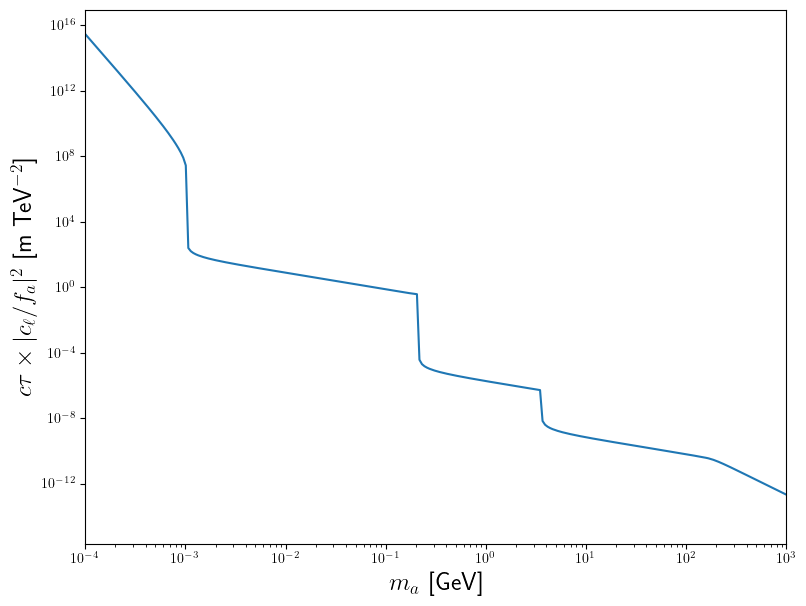

In [20]:
fig = plt.figure(figsize=(8,6))
plt.loglog(list_mphi, [hbarc/sum(l)*1e-6 for l in listGamma_L])
plt.xlabel(r'$m_a$ [GeV]', fontsize=18)
plt.ylabel(r"$c\tau\times|c_\ell/f_a|^2$ [m TeV${}^{-2}$]", fontsize=18)
plt.xlim(1e-4, 1000)
plt.tight_layout(pad=0.5)

### $\chi_R$

In [21]:
def Gamma_phi_R(mphi: float) -> list[float]:
    chiV = 0.5
    chiA = 0.5
    def f(x):
        if x >= 1:
            return np.arcsin(x**-0.5)
        else:
            return np.pi/2+0.5j*np.log((1+(1-x)**0.5)/(1-(1-x)**0.5))
    B1 = lambda x: 1-x*f(x)**2
    B3 = lambda x, y: 1- x*y/(y-x)*(f(x)**2-f(y)**2)
    kallen = lambda x, y, z: x**2+y**2+z**2-2*x*y-2*x*z-2*y*z
    res = [chiA**2*a_em**2*mphi**3/(Lambda**2*(4*np.pi)**3)*abs(B1(4*mtau**2/mphi**2)+B1(4*me**2/mphi**2)+B1(4*mmu**2/mphi**2))**2, 0, 0, 0, 0, 0, 0]
    #res = [4*np.pi*a_em**2/Lambda**2*mphi**3*abs(B1(4*mtau**2/mphi**2)+0*B1(4*mmu**2/mphi**2)+0*B1(4*me**2/mphi**2))**2/(16*np.pi)**2, 0, 0, 0]
    if mphi > 2*me:
        res[1] = chiA**2*mphi * me**2/(8*np.pi*Lambda**2)*np.sqrt(1-4*me**2/mphi**2)
    if mphi > 2*mmu:
        res[2] = chiA**2*mphi * mmu**2/(8*np.pi*Lambda**2)*np.sqrt(1-4*mmu**2/mphi**2)
    if mphi > 2*mtau:
        res[3] = chiA**2*mphi * mtau**2/(8*np.pi*Lambda**2)*np.sqrt(1-4*mtau**2/mphi**2)
    if mphi > mZ:
        cgammaZ = chiA*(1-4*s2W)/(2*s2W**0.5*c2W**0.5)*abs(B3(4*mtau**2/mphi**2, 4*mtau**2/mZ**2)+B3(4*me**2/mphi**2, 4*me**2/mZ**2)+B3(4*mmu**2/mphi**2, 4*mmu**2/mZ**2))**2-3*chiV/(2*s2W**0.5*c2W**0.5)
        res[4] = a_em**2*mphi**3/(2*Lambda**2*(4*np.pi)**3)*(1-mZ**2/mphi**2)**3*abs(cgammaZ)**2
    if mphi > 2*mW:
        cWW = 3/(2*s2W)*(chiA-chiV)
        res[5] = a_em**2*mphi**3/(2*Lambda**2*(4*np.pi)**3)*(1-4*mW**2/mphi**2)**1.5*abs(cWW)**2
    if mphi > 2*mZ:
        cZZ = 3*(chiA*(1-2*s2W+4*s2W**2)-chiV*(1-2*s2W))/(4*s2W*c2W)
        res[6] = a_em**2*mphi**3/(Lambda**2*(4*np.pi)**3)*(1-4*mZ**2/mphi**2)**1.5*abs(cZZ)**2
    #if mphi > mZ+mhiggs:
    #    res[7] = 1/(2*(8*np.pi)**3*Lambda**2*vev**2)*kallen(mphi**2, mhiggs**2, mZ**2)**1.5/(mphi**3*mZ**2)*(me**2*FHiggs(mphi, me)+mmu**2*FHiggs(mphi, mmu)+mtau**2*FHiggs(mphi, mtau))**2
    return res

In [22]:
listGamma_R = [Gamma_phi_R(m) for m in list_mphi]

/tmp/ipykernel_21501/2064487355.py:10: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 2e-6)


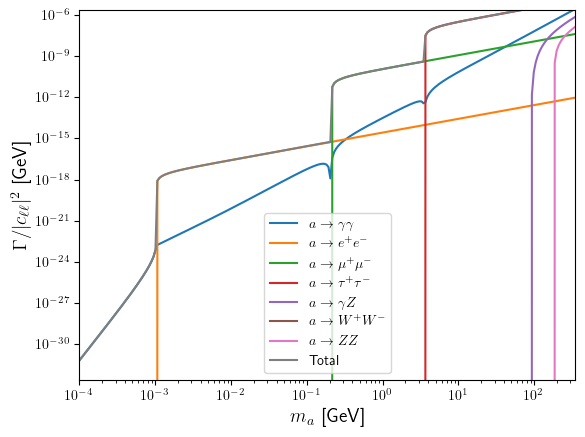

In [23]:
plt.loglog(list_mphi, [l[0] for l in listGamma_R], label= r"$a\to\gamma\gamma$")
plt.loglog(list_mphi, [l[1] for l in listGamma_R], label= r"$a\to e^+ e^-$")
plt.loglog(list_mphi, [l[2] for l in listGamma_R], label= r"$a\to \mu^+ \mu^-$")
plt.loglog(list_mphi, [l[3] for l in listGamma_R], label=r"$a\to \tau^+ \tau^-$")
plt.loglog(list_mphi, [l[4] for l in listGamma_R], label=r"$a\to \gamma Z$")
plt.loglog(list_mphi, [l[5] for l in listGamma_R], label=r"$a\to W^+ W^-$")
plt.loglog(list_mphi, [l[6] for l in listGamma_R], label=r"$a\to ZZ$")
#plt.loglog(list_mphi, [l[7] for l in listGamma], label=r"$a\to Zh$")
plt.loglog(list_mphi, [sum(l) for l in listGamma_R], label='Total')
plt.ylim(0, 2e-6)
plt.xlim(1e-4, 350)
plt.xlabel(r'$m_a$ [GeV]', fontsize=14)
plt.ylabel(r"$\Gamma/|c_{\ell\ell}|^2$ [GeV]", fontsize=14)
plt.legend()

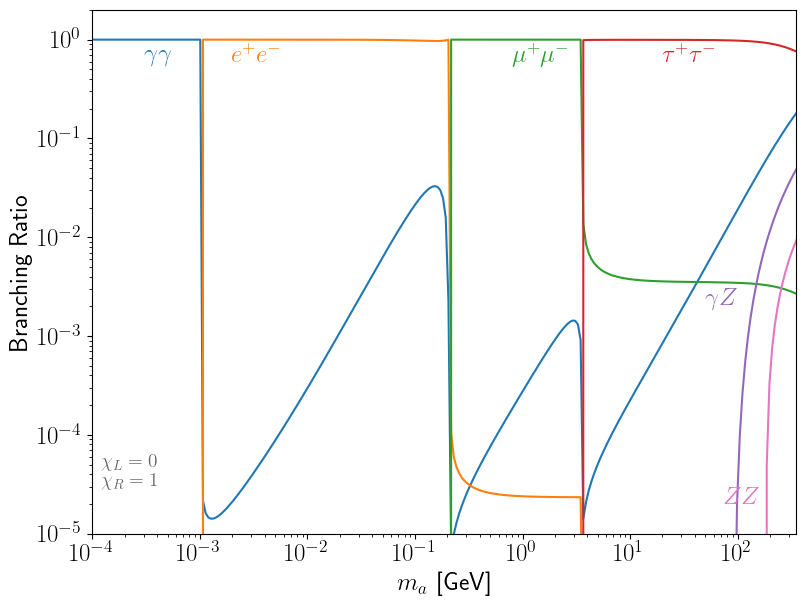

In [24]:
fig = plt.figure(figsize=(8,6))
plt.loglog(list_mphi, [l[0]/sum(l) for l in listGamma_R], label=r'$\gamma\gamma$', lw=1.5)
plt.annotate(r"$\gamma\gamma$", (3e-4, 0.6), color='tab:blue', fontsize=18)
plt.loglog(list_mphi, [l[1]/sum(l) for l in listGamma_R], label=r'$e^+e^-$', lw=1.5)
plt.annotate(r"$e^+e^-$", (2e-3, 0.6), color='tab:orange', fontsize=18)
plt.loglog(list_mphi, [l[2]/sum(l) for l in listGamma_R], label=r'$\mu^+\mu^-$', lw=1.5)
plt.annotate(r"$\mu^+\mu^-$", (0.8, 0.6), color='tab:green', fontsize=18)
plt.loglog(list_mphi, [l[3]/sum(l) for l in listGamma_R], label=r'$\tau^+\tau^-$', lw=1.5)
plt.annotate(r"$\tau^+\tau^-$", (20, 0.6), color='tab:red', fontsize=18)
plt.loglog(list_mphi, [l[4]/sum(l) for l in listGamma_R], label=r'$\gamma Z$', lw=1.5)
plt.annotate(r"$\gamma Z$", (50, 2e-3), color='tab:purple', fontsize=18)
#plt.loglog(list_mphi, [l[5]/sum(l) for l in listGamma_R], label=r'$W^+ W^-$', lw=1.5)
#plt.annotate(r"$W^+W^-$", (33, 0.8e-3), color='tab:brown', fontsize=18)
plt.loglog(list_mphi, [l[6]/sum(l) for l in listGamma_R], label=r'$Z Z$', lw=1.5, c='tab:pink')
plt.annotate(r"$ZZ$", (75, 2e-5), color='tab:pink', fontsize=18)
plt.ylim([1e-5, 2])
plt.xlim(1e-4, 350)
plt.xlabel(r'$m_a$ [GeV]', fontsize=18)
plt.ylabel(r"Branching Ratio", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.annotate(r"$\chi_L = 0$" + '\n' + r"$\chi_R=1$", (1.2e-4, 3e-5), fontsize=14, color=(0.4, 0.4, 0.4))
#plt.yticks([1e-10,1e-8,1e-6,1e-4,1e-2,1])
#plt.legend(fontsize=16)
plt.tight_layout(pad=0.5)

## $\tau$-philic scenario

In [25]:
def Gamma_phi_tau(mphi: float) -> list[float]:
    def f(x):
        if x >= 1:
            return np.arcsin(x**-0.5)
        else:
            return np.pi/2+0.5j*np.log((1+(1-x)**0.5)/(1-(1-x)**0.5))
    B1 = lambda x: 1-x*f(x)**2
    B3 = lambda x, y: 1- x*y/(y-x)*(f(x)**2-f(y)**2)
    res = [a_em**2*mphi**3/(Lambda**2*(4*np.pi)**3)*abs(B1(4*mtau**2/mphi**2))**2, 0, 0, 0, 0]
    #res = [4*np.pi*a_em**2/Lambda**2*mphi**3*abs(B1(4*mtau**2/mphi**2)+0*B1(4*mmu**2/mphi**2)+0*B1(4*me**2/mphi**2))**2/(16*np.pi)**2, 0, 0, 0]
    if mphi > 2*mtau:
        res[1] = mphi * mtau**2/(8*np.pi*Lambda**2)*np.sqrt(1-4*mtau**2/mphi**2)
    if mphi > mZ:
        cgammaZ = (1-4*s2W)/(2*s2W**0.5*c2W**0.5)*abs(B3(4*mtau**2/mphi**2, 4*mtau**2/mZ**2))**2
        res[2] = a_em**2*mphi**3/(2*Lambda**2*(4*np.pi)**3)*(1-mZ**2/mphi**2)**3*abs(cgammaZ)**2
    if mphi > 2*mW:
        cWW = 1/(2*s2W)
        res[3] = a_em**2*mphi**3/(2*Lambda**2*(4*np.pi)**3)*(1-4*mW**2/mphi**2)**1.5*abs(cWW)**2
    if mphi > 2*mZ:
        cZZ = (1-2*s2W+4*s2W**2)/(4*s2W*c2W)
        res[4] = a_em**2*mphi**3/(Lambda**2*(4*np.pi)**3)*(1-4*mZ**2/mphi**2)**1.5*abs(cZZ)**2
    return res

In [26]:
listGamma_tau = [Gamma_phi_tau(m) for m in list_mphi]

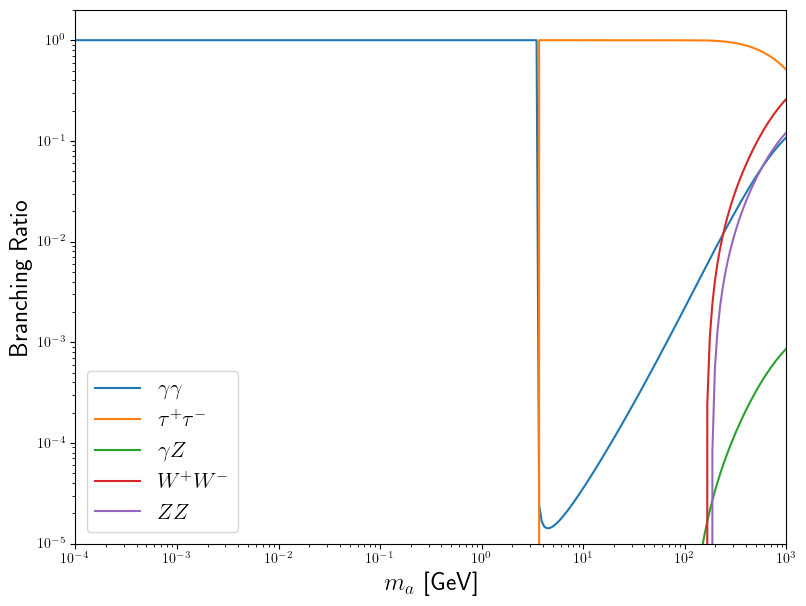

In [27]:
fig = plt.figure(figsize=(8,6))
plt.loglog(list_mphi, [l[0]/sum(l) for l in listGamma_tau], label=r'$\gamma\gamma$', lw=1.5)
plt.loglog(list_mphi, [l[1]/sum(l) for l in listGamma_tau], label=r'$\tau^+\tau^-$', lw=1.5)
plt.loglog(list_mphi, [l[2]/sum(l) for l in listGamma_tau], label=r'$\gamma Z$', lw=1.5)
plt.loglog(list_mphi, [l[3]/sum(l) for l in listGamma_tau], label=r'$W^+W^-$', lw=1.5)
plt.loglog(list_mphi, [l[4]/sum(l) for l in listGamma_tau], label=r'$ZZ$', lw=1.5)
plt.ylim([1e-5, 2])
plt.xlim(1e-4, 1000)
plt.xlabel(r'$m_a$ [GeV]', fontsize=18)
plt.ylabel(r"Branching Ratio", fontsize=18)
#plt.yticks([1e-10,1e-8,1e-6,1e-4,1e-2,1])
plt.legend(fontsize=16)
plt.tight_layout(pad=0.5)
#fig.patch.set_alpha(0)
plt.savefig('BR_tau.png')

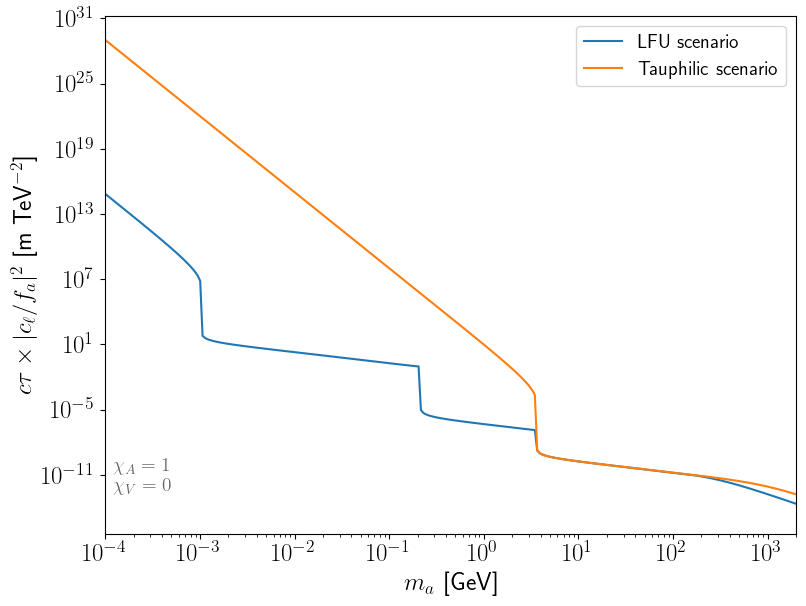

In [28]:
fig = plt.figure(figsize=(8,6))
plt.loglog(list_mphi, [hbarc/sum(l)*1e-6 for l in listGamma], label='LFU scenario')
plt.loglog(list_mphi, [hbarc/sum(l)*1e-6 for l in listGamma_tau], label=r'Tauphilic scenario')
plt.xlabel(r'$m_a$ [GeV]', fontsize=18)
plt.ylabel(r"$c\tau\times|c_\ell/f_a|^2$ [m TeV${}^{-2}$]", fontsize=18)
plt.xlim(1e-4, 2000)
plt.tight_layout(pad=0.5)
#fig.patch.set_alpha(0)
plt.legend(fontsize=14)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.annotate(r"$\chi_A = 1$" + '\n' + r"$\chi_V=0$", (1.2e-4, 3e-13), fontsize=14, color=(0.4, 0.4, 0.4))
plt.tight_layout(pad=0.5)
plt.savefig('decaylength.pdf')

In [77]:
[hbarc*1e-6/sum(Gamma_phi_tau(m))/0.3**2 for m in (1, 2, 3, 4, 5)]

[107.43979019630665,
 0.6218141064456136,
 0.017359298782137576,
 9.505752748338728e-09,
 4.962120215368341e-09]

In [83]:
prob = lambda sqrts, ma, gagg: 3/(hbarc*1e-6)* (2 *sqrts * ma)/(sqrts**2+ma**2) * gagg**2*ma**3/(64*np.pi)

In [89]:
def prob(L, ma, gagg):
    sqrts = 10.58
    gamma = (sqrts**2+ma**2)/(2*sqrts*ma)
    decay = gagg**2*ma**3/(64*np.pi)
    return L/(hbarc*1e-6)*decay/gamma

In [90]:
prob(3, 0.0422, 0.000154)

1.0750622249470287

In [91]:
(1/prob(3, 0.0422, 1))**0.5

0.00014852649066138154

In [92]:
(1/prob(0.1, 0.0422, 1))**0.5

0.0008135130932231906

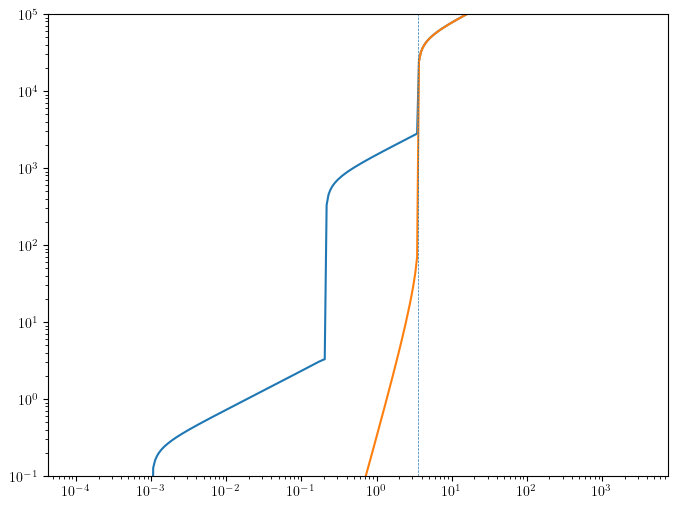

In [22]:
fig = plt.figure(figsize=(8,6))
plt.loglog(list_mphi, [(sum(l)*1e6/hbarc)**0.5 for l in listGamma], label='Universal scenario')
plt.loglog(list_mphi, [(sum(l)*1e6/hbarc)**0.5 for l in listGamma_tau], label=r'$\tau$-philic scenario')
plt.ylim(1e-1, 1e5)
plt.axvline(2*mtau, ls='dashed', lw=0.5)

# Move to another notebook

\begin{equation}
\begin{split}
\frac{d \bar{\Gamma}}{dx_1 dx_2} &= \left(\frac{g}{4 c_w}\right)^2 \frac{m_\tau^2 C_\tau^2}{\Lambda^2} \frac{m_Z}{192 \pi^3} \\
& \qquad 
\left[\frac{1}{(1-x_1)(1-x_2)} \left( -2+4x_1+4x_2-8x_1x_2-x_1^2-x_2^2 +2x_1x_2^2+2x_1^2x_2 \right. \right. \\
& \left.\left. \qquad \qquad \qquad \qquad \qquad \qquad+ (c^2-2\varepsilon)(2-x_1-x_2)^2-2r^2(1-c^2)\right)\right.\\
& \qquad \left.+ \frac{r}{(1-x_1)^2(1-x_2^2)} \left[ \left( 4-8x_1-8x_2+16 x_1x_2 +3x_1^2+3x_2^2-6x_1x_2^2-6x_1^2x_2 + 2x_1^2x_2^2 \right. \right. \right.\\
& \qquad \left. \left. \left.+ \varepsilon (8-8x_1-8x_2+4x_1^2+4x_2^2) \right)+ c^2 \left(-6 + 8x_1 + 8x_2 -8x_1x_2 - 3x_1^2-3x_2^2 + 2x_1x_2^2+2x_1^2x_2 \right.\right.\right.\\
& \qquad  \left. \left. \left. + \varepsilon (-8 + 8x_1 + 8x_2 - 4x_1x_2 - 2x_1^2-2x_2^2)\right) \right] \right]
\end{split}
\end{equation}

In [23]:
def integrand(x2, x1, mphi, mlep):
    r = mphi**2/mZ**2
    eps = mlep**2/mZ**2
    return prefactor * mlep**2/Lambda**2 *mZ/(192*np.pi**3)*((-2+4*x1+4*x2-8*x1*x2-x1**2-x2**2+2*x1*x2**2+2*x1**2*x2+c**2*(2-x1-x2)**2-2*r**2*(1-c)**2)/(1-x1)/(1-x2) + r/(1-x1)**2/(1-x2)**2*((4-8*x1-8*x2+16*x1*x2+3*x1**2+3*x2**2-6*x1*x2**2-6*x1**2*x2+2*x1**2*x2**2+eps*(8-8*x1-8*x2+4*x1**2+4*x2**2))+c**2*(-6+8*x1+8*x2-8*x1*x2-3*x1**2-3*x2**2+2*x1*x2**2+2*x1**2*x2+eps*(-8+8*x1+8*x2-4*x1*x2-2*x1**2-2*x2**2)) ))

\begin{equation}
\begin{split}
    x_2^{\text{max}} &= \frac{2 - 2 r - 3 x_1 + r x_1 + x_1^2 + 4 \varepsilon  - 2 x_1 \varepsilon  + 
   \sqrt{x_1^2 - 4 \varepsilon} \, \sqrt{
     1 - 2 r + r^2 - 2 x_1 + 2 r x_1 + x_1^2 - 4 r \varepsilon}}{2 (1 - x_1 + \varepsilon)}\\
    x_2^{\text{min}} &= \frac{2 - 2 r - 3 x_1 + r x_1 + x_1^2 + 4 \varepsilon  - 2 x_1 \varepsilon  - 
   \sqrt{x_1^2 - 4 \varepsilon} \, \sqrt{
     1 - 2 r + r^2 - 2 x_1 + 2 r x_1 + x_1^2 - 4 r \varepsilon}}{2 (1 - x_1 + \varepsilon)}
\end{split}
\end{equation}

In [24]:
def x2min(x1, mphi, mlep):
    r = mphi**2/mZ**2
    eps = mlep**2/mZ**2
    return (2-2*r-3*x1+r*x1+x1**2+4*eps-2*x1*eps-(x1**2-4*eps)**0.5*(1-2*r+r**2-2*x1+2*r*x1+x1**2-4*r*eps)**0.5)/2/(1-x1+eps)

In [25]:
def x2max(x1, mphi, mlep):
    r = mphi**2/mZ**2
    eps = mlep**2/mZ**2
    return (2-2*r-3*x1+r*x1+x1**2+4*eps-2*x1*eps+(x1**2-4*eps)**0.5*(1-2*r+r**2-2*x1+2*r*x1+x1**2-4*r*eps)**0.5)/2/(1-x1+eps)

In [26]:
def dGammadx1(x1, mphi, mlep):
    return quad(integrand, x2min(x1, mphi, mlep), x2max(x1, mphi, mlep), (x1, mphi, mlep))[0]

In [27]:
def Gamma(mphi: float, mlep) -> float:
    r = mphi**2/mZ**2
    eps = mlep**2/mZ**2
    x1min = 2*eps**0.5
    x1max = 1-r-2*eps**0.5*r**0.5
    return quad(lambda x1: dGammadx1(x1, mphi, mlep), x1min, x1max)[0]

In [28]:
def Gamma_tot(mphi):
    return Gamma(mphi, me) + Gamma(mphi, mmu) + Gamma(mphi, mtau)

\begin{equation}
\begin{split}
    x_1^{\text{max}} &= 1- r -2 \sqrt{\varepsilon} \, \sqrt{r} \\
    x_1^{\text{min}} &= 2 \sqrt{\varepsilon}
\end{split}
\end{equation}

In [29]:
list_mphi = [10**x for x in np.linspace(-4, 1+np.log10(2), 150)]
list_GammaZ_tau = [Gamma(m, mtau) for m in list_mphi]
list_GammaZ_tot = [Gamma_tot(m) for m in list_mphi]

(0.001, 20)

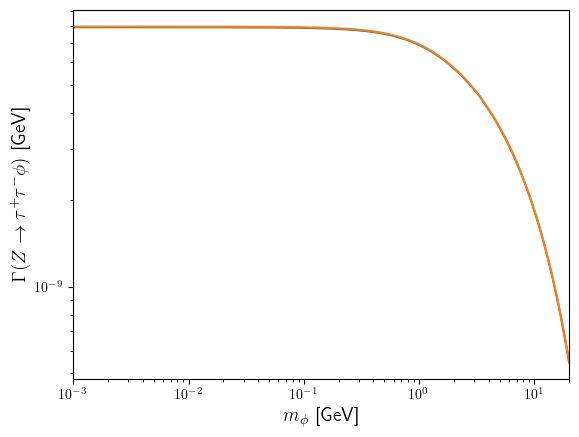

In [30]:
plt.loglog(list_mphi, list_GammaZ_tau)
plt.loglog(list_mphi, list_GammaZ_tot)
plt.xlabel(r"$m_\phi$ [GeV]", fontsize=14)
plt.ylabel(r"$\Gamma(Z\to\tau^+\tau^-\phi)$ [GeV]", fontsize=14)
plt.xlim(1e-3, 20)

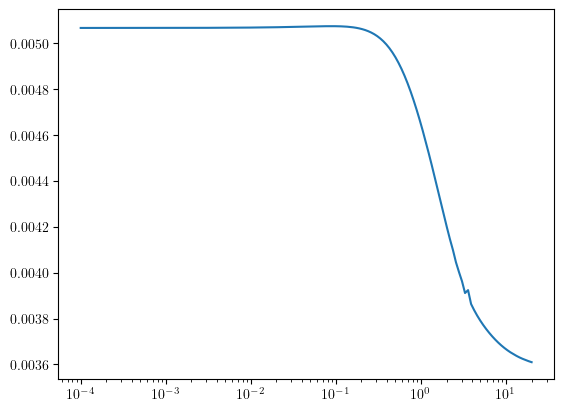

In [31]:
plt.semilogx(list_mphi, (np.array(list_GammaZ_tot)-np.array(list_GammaZ_tau))/np.array(list_GammaZ_tot))

In [32]:
dGamma_Ztau = 2.4955*8.3e-5

In [33]:
with open("Zdecay.dat", "wt") as f:
    f.write("ma_GeV\tctau_Z\n")
    for m in (10**x for x in np.linspace(-3, np.log10(2*mtau), 100)):
        f.write(f"{m}\t{(dGamma_Ztau/Gamma(m))**0.5}\n")

TypeError: Gamma() missing 1 required positional argument: 'mlep'

In [ ]:
delta_Gammatot_Z = 0.0023

bound_Gammatot_Z_tau = np.sqrt(delta_Gammatot_Z/np.array(list_GammaZ))

In [ ]:
fig = plt.figure(figsize=(8, 6))
plt.loglog(list_mphi, (dGamma_Ztau/np.array(list_GammaZ))**0.5, lw=2.5)
plt.fill_between(list_mphi, (dGamma_Ztau/np.array(list_GammaZ))**0.5, 1e7, alpha=0.2)
plt.loglog(list_mphi, bound_Gammatot_Z_tau, lw=2.5)
plt.fill_between(list_mphi, bound_Gammatot_Z_tau, 1e7, alpha=0.2)
plt.xlabel(r"$m_a$ [GeV]", fontsize=18)
plt.ylabel(r"$|c_{\tau\tau}|$", fontsize=18)
plt.title(r"$\Gamma(Z\to \tau^+\tau^- a)$", fontsize=18)
plt.xlim(1e-3, 20)
plt.ylim(1, 1e7)
plt.savefig("Zdecay.png")

In [ ]:
with open("Ztot_tau.dat", "wt") as f:
    f.write("ma_GeV\tctau_Z\n")
    for i, m in enumerate(10**x for x in np.linspace(-3, 1+np.log10(2), 100)):
        f.write(f"{m}\t{bound_Gammatot_Z_tau[i]}\n")

## $W^- \to \tau^- \bar{\nu} a$

$$\text{x12} \text{x23}^2-2 \text{x12} \text{x23}-2 \text{x23}^2+2 \text{x23}$$
$$+((3-\text{x12}) \text{x23}+(2 \text{x12}-2))\epsilon_\tau-\epsilon_\tau^2$$
$$+(2 x23-2)\epsilon_a + (x23-1)\epsilon_a\epsilon_\tau - \epsilon_a\epsilon_\tau^2$$

In [31]:
def dGammaW(x23, x12, ma, mlep):
    ea = ma**2/mW**2
    etau = mlep**2/mW**2
    return (x12*x23**2-2*x12*x23-2*x23**2+2*x23+(3*x23-x12*x23+2*x12-2)*etau-etau**2+(2*x23-2)*ea+(x23-1)*ea*etau-ea*etau**2)/(x23-etau)**2
    #return (x12*x23**2-2*x12*x23-2*x23**2+2*x23)/(x23-etau)**2

In [32]:
def intGammaW(x12, ma, mlep):
    ea = ma**2/mW**2
    etau = mlep**2/mW**2
    e2 = (x12+etau)/(2*x12**0.5)
    e3 = (1-x12-ea)/(2*x12**0.5)
    x23min = (e2+e3)**2-((e2**2-etau)**0.5+(e3**2-ea)**0.5)**2
    x23max = (e2+e3)**2-((e2**2-etau)**0.5-(e3**2-ea)**0.5)**2
    return quad(lambda x: dGammaW(x, x12, ma, mlep), x23min, x23max)[0]

In [33]:
def GammaW(ma, mlep):
    ea = ma**2/mW**2
    etau = mlep**2/mW**2
    x12min = etau
    x12max = (1-ea**0.5)**2
    return quad(lambda x: intGammaW(x, ma, mlep), x12min, x12max)[0]#*a_em*mW/(4*np.pi**2*96*s2W)*mlep**2

def GammaW_tot(ma):
    return GammaW(ma, me) + GammaW(ma, mmu) + GammaW(ma, mtau)

In [40]:
g00 = GammaW(0, 0)

/tmp/ipykernel_7912/2289381716.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(lambda x: dGammaW(x, x12, ma, mlep), x23min, x23max)[0]


In [42]:
g0lep = [GammaW(0, 10**x)-g00 for x in np.linspace(-4, 0.5)]

/tmp/ipykernel_7912/2917365301.py:6: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(lambda x: intGammaW(x, ma, mlep), x12min, x12max)[0]#*a_em*mW/(4*np.pi**2*96*s2W)*mlep**2
/tmp/ipykernel_7912/2917365301.py:6: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return quad(lambda x: intGammaW(x, ma, mlep), x12min, x12max)[0]#*a_em*mW/(4*np.pi**2*96*s2W)*mlep**2


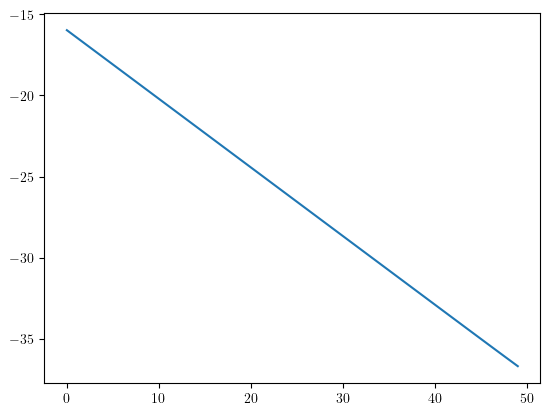

In [43]:
plt.plot(g0lep)

In [7]:
def integral(ma, mlep):
    ea = ma**2/mW**2
    etau = mlep**2/mW**2
    return -11/6 + ea*np.log(ea) + np.log(etau)*(-1-2*etau+(ea/(ea-etau))**2)

In [24]:
integral(1, me)

-1.83470385250847

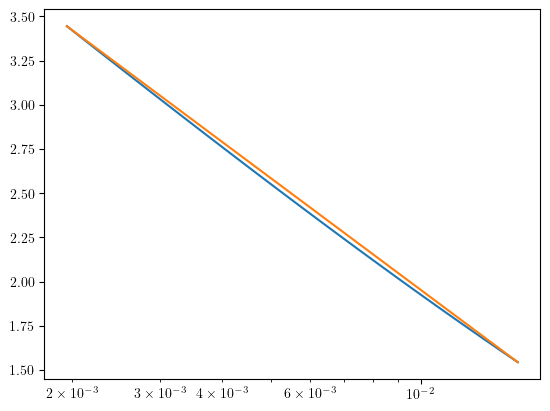

In [56]:
plt.semilogx(np.linspace(1/512 ,1/64, 100), gW_a)
plt.semilogx(np.linspace(1/512 ,1/64, 100), [-0.9137928985041825*np.log(ea)-0.8912065561518183*np.log(1e-12)-26.881004529260668 for ea in np.linspace(1/512 ,1/64, 100)])

In [47]:
gW_a[-1]

1.5443004697074276

In [44]:
gW_lep = [GammaW(1e-6*mW, ea**0.5*mW) for ea in np.linspace(1/512, 1/40, 100)]

In [73]:
ma_rnd = []
ml_rnd = []
gammaW_rnd = []
for _ in range(1000):
    ma0 = 10**np.random.uniform(-3, 1)
    ml0 = 10**np.random.uniform(-4, 0.5)
    ma_rnd.append(ma0)
    ml_rnd.append(ml0)
    gammaW_rnd.append(GammaW(ma0, ml0))

/tmp/ipykernel_21426/2917365301.py:6: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return quad(lambda x: intGammaW(x, ma, mlep), x12min, x12max)[0]#*a_em*mW/(4*np.pi**2*96*s2W)*mlep**2


In [74]:
A = np.vstack([np.log(np.array(ma_rnd)**2/mW**2), np.log(np.array(ml_rnd)**2/mW**2), np.ones(1000)]).T

In [75]:
np.linalg.lstsq(A, gammaW_rnd)

/tmp/ipykernel_21426/2920223160.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(A, gammaW_rnd)


(array([-0.68660768, -0.31251406, -5.53213623]),
 array([3450.18552504]),
 3,
 array([711.45828264, 168.73844351,   8.30906239]))

In [69]:
aW

-0.7011289492584738

In [70]:
bW

-0.35274089524761787

In [71]:
cW

-6.801720866541459

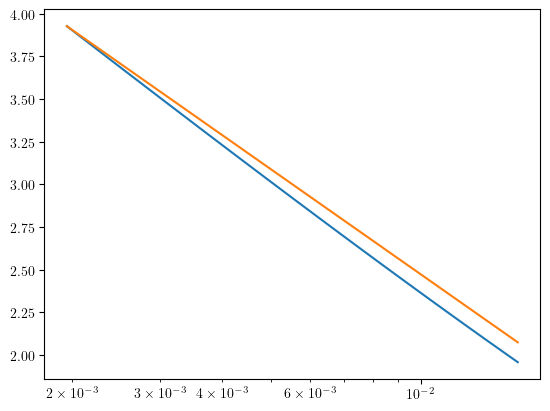

In [63]:
plt.semilogx(np.linspace(1/512 ,1/64, 100), gW_lep)
plt.semilogx(np.linspace(1/512 ,1/64, 100), [-0.9137928985041825*np.log(1e-12)-0.8912065561518183*np.log(ea)-26.881004529260668 for ea in np.linspace(1/512 ,1/64, 100)])

In [58]:
26.881004529260668/30

0.8960334843086889

In [48]:
gW_lep[0]

3.927662150132491

In [49]:
gW_lep[-1]

1.9581801383280695

In [ ]:
errGammaW = 0.21/100*2.085

In [ ]:
bound_GammaW = [(errGammaW/GammaW(ma, mtau))**0.5*Lambda for ma in list_mphi]

In [ ]:
errWtot = 0.042

bound_Wtot = [(errWtot/GammaW(ma, mtau))**0.5*Lambda for ma in list_mphi]

In [ ]:
bound_Wtotlep = [(errWtot/GammaW_tot(ma))**0.5*Lambda for ma in list_mphi]

In [ ]:
fig = plt.figure(figsize=(8, 6))
#plt.loglog(list_mphi, (dGamma_Ztau/np.array(list_GammaZ))**0.5, lw=2.5, label=r'$Z\to\tau^+\tau^-a$')
#plt.fill_between(list_mphi, (dGamma_Ztau/np.array(list_GammaZ))**0.5, 1e7, alpha=0.2)
plt.loglog(list_mphi, bound_GammaW, lw=2.5, label=r'$W^-\to\tau^-\bar{\nu}_\tau a$')
plt.fill_between(list_mphi, bound_GammaW, 1e7, alpha=0.2)
plt.loglog(list_mphi, bound_Wtot, lw=2.5, label=r'$\Gamma_W (\tau)$')
plt.fill_between(list_mphi, bound_Wtot, 1e7, alpha=0.2)
plt.loglog(list_mphi, bound_Wtotlep, lw=2.5, label=r'$\Gamma_W (\ell)$')
plt.fill_between(list_mphi, bound_Wtotlep, 1e7, alpha=0.2)
plt.xlabel(r"$m_a$ [GeV]", fontsize=18)
plt.ylabel(r"$|c_{\tau\tau}|$", fontsize=18)
plt.legend(fontsize=16)
plt.xlim(1e-3, 10)
plt.ylim(1, 1e7)
plt.tight_layout(pad=0.5)
fig.patch.set_alpha(0)
plt.savefig("boson_decay.png")

In [ ]:
plt.semilogx(list_mphi, (np.array(bound_Wtot)-np.array(bound_Wtotlep))/np.array(bound_Wtotlep))

In [ ]:
with open("Wdecay.dat", "wt") as f:
    f.write("ma_GeV\tctau_W\n")
    for m in (10**x for x in np.linspace(-3, np.log10(2*mtau), 100)):
        f.write(f"{m}\t{(errGammaW/GammaW(m))**0.5*Lambda/mtau}\n")

In [ ]:
with open("Wtot_tau.dat", "wt") as f:
    f.write("ma_GeV\tctau_W\n")
    for i, m in enumerate(10**x for x in np.linspace(-3, 1+np.log10(2*mtau), 100)):
        f.write(f"{m}\t{bound_Wtot[i]}\n")